In [3]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy
from z3 import *

<img src="https://logic-masters.de/Dateien/bild.php?data=da58bd94-10923-303030355a482d31" width="450">

Took 1.3324642181396484 secs


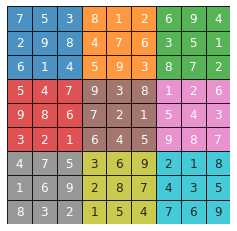

In [16]:
def z3_sudoku(grid):
    s = Tactic("pqffd").solver()
    N =9
    X = np.array(IntVector('x', N*N),dtype=object).reshape((N,N))

    #standard rules
    s += [And(e>0,e<10) for (i,j),e in np.ndenumerate(X)]
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if i == n]) for n in range(N)]
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if j == n]) for n in range(N)]
    
    groups = np.block([[np.ones((3,3),dtype=int)*(i+j*3) for i in range(3)]for j in range(3)])
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j] == n]) for n in range(N)]
    
    #knight moves
    knight_moves = [f(i,j) for i,j in itertools.product([1, -1],[2,-2]) for f in [lambda i,j:(i,j),lambda i,j:(j,i)]]
    s+= [e != X[i+a,j+b] for a,b in knight_moves for (i,j),e in np.ndenumerate(X) 
                    if i+a >=0 and i+a<9 and j+b >=0 and j+b<9]
   
    # diagonal sums
    s += Sum([X[4+i,i] for i in range(5)]) == 23
    s += Sum([X[i,5-i] for i in range(6)]) == 32
    
    #arrows
    s+= X[3,2] == X[4,3]    
    s+= X[5,7] == X[6,8]
    
    s+= Sum([X[5,i] for i in range(3)]) == X[5,3]
    s+= X[4,2]==X[5,3]
    s+= X[6,4]==X[5,3]
    s+= Sum([X[6+i,3] for i in range(3)]) == X[5,3]
    s+= Sum([X[4,4],X[3,4],X[4,5]]) == X[5,3]
       
    # box
    s += Distinct([X[1,4],X[1,5],X[2,4],X[2,5],X[3,5],X[3,6],X[3,7],X[4,6],X[4,7]])
    
    #dots
    dot = lambda a,b,c,d : Or(X[a,b]== X[c,d]+X[c,d],X[c,d]==X[a,b]+X[a,b])
    s+= dot(0,4,0,5)
    s+= dot(0,6,1,6)
    s+= dot(3,8,4,8)
    s+= dot(6,6,6,7)
    s+= dot(6,6,7,6)
    
    start = time.time()
    evalu = np.vectorize(lambda x :m.evaluate(x).as_long())
    if s.check() == sat:
        print("Took {} secs".format(time.time()-start))
        m = s.model()
        result = evalu(X)
        fig,ax = plt.subplots(1,1,figsize=(4,4))        
        ax = sns.heatmap(groups,annot=result,cbar=False,
                         cmap="tab10",linecolor="k",linewidths=1,annot_kws={"size":12},alpha =.8)
        ax.axis("off")
    else:
        print("Failed in {} seconds".format(time.time()-start))

z3_sudoku(np.zeros((9,9)))

In [5]:
soln =[[7,5,3,8,1,2,6,9,4],
       [2,9,8,4,7,6,3,5,1],
       [6,1,4,5,9,3,8,7,2],
       [5,4,7,9,3,8,1,2,6],
       [9,8,6,7,2,1,5,4,3],
       [3,2,1,6,4,5,9,8,7],
       [4,7,5,3,6,9,2,1,8],
       [1,6,9,2,8,7,4,3,5],
       [8,3,2,1,5,4,7,6,9]]